In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movie_rating.csv')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<Axes: >

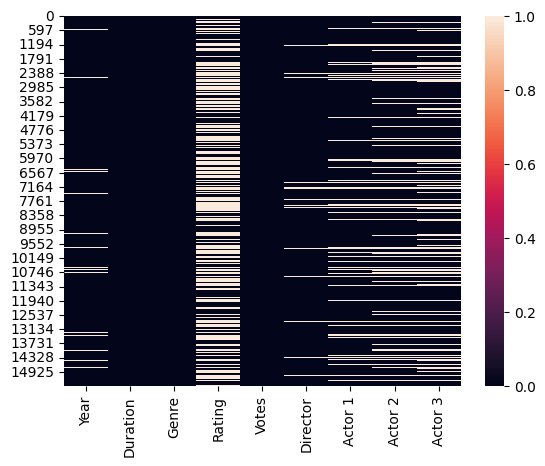

In [86]:
sns.heatmap(df.isnull())

In [5]:
X = df.drop(labels='Rating',axis=1)
y = df.Rating

In [6]:
df.drop(labels='Name' , axis=1,inplace=True)

In [7]:
X.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
y.head()

0    NaN
1    7.0
2    NaN
3    4.4
4    NaN
Name: Rating, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
##pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  float64
 1   Duration  7240 non-null   object 
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [14]:
df['Duration'].head()

0        NaN
1    109 min
2     90 min
3    110 min
4    105 min
Name: Duration, dtype: object

In [15]:
df['Duration']

0            NaN
1        109 min
2         90 min
3        110 min
4        105 min
          ...   
15504        NaN
15505    129 min
15506        NaN
15507        NaN
15508    130 min
Name: Duration, Length: 15509, dtype: object

In [16]:
df['Duration'].str.split(' ').str[0]

0        NaN
1        109
2         90
3        110
4        105
        ... 
15504    NaN
15505    129
15506    NaN
15507    NaN
15508    130
Name: Duration, Length: 15509, dtype: object

In [17]:
df['Duration'] = df['Duration'].fillna('120')

In [19]:
df['Duration'].head()

0        120
1    109 min
2     90 min
3    110 min
4    105 min
Name: Duration, dtype: object

In [20]:
df['Duration']=df['Duration'].str.split(' ').str[0]

In [21]:
df['Duration'].head()

0    120
1    109
2     90
3    110
4    105
Name: Duration, dtype: object

In [23]:
df['Duration'] = df['Duration'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  float64
 1   Duration  15509 non-null  int32  
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), int32(1), object(6)
memory usage: 1.0+ MB


In [25]:
##For Genre

In [26]:
df['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [28]:
df['Genre'] = df['Genre'].str.split(',').str[0]

In [30]:
df['Genre']

0         Drama
1         Drama
2         Drama
3        Comedy
4         Drama
          ...  
15504    Action
15505    Action
15506    Action
15507    Action
15508    Action
Name: Genre, Length: 15509, dtype: object

In [31]:
df['Genre'].isnull().sum()

1877

In [40]:
mode=df[df['Genre'].notna()]['Genre'].mode()[0]

In [41]:
df['Genre'] = df['Genre'].fillna('Drama')

In [42]:
df['Genre'].isnull().sum()

0

In [43]:
mode

'Drama'

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
label = LabelEncoder()

In [47]:
labeled = label.fit_transform(df[['Genre']])

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
labeled

array([7, 7, 7, ..., 0, 0, 0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  float64
 1   Duration  15509 non-null  int32  
 2   Genre     15509 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), int32(1), object(6)
memory usage: 1.0+ MB


In [54]:
labeled.astype(int)

array([7, 7, 7, ..., 0, 0, 0])

In [55]:
df['Genre'] = labeled

In [56]:
df['Genre'].head()

0    7
1    7
2    7
3    4
4    7
Name: Genre, dtype: int32

In [57]:
df['Genre'].astype(int)

0        7
1        7
2        7
3        4
4        7
        ..
15504    0
15505    0
15506    0
15507    0
15508    0
Name: Genre, Length: 15509, dtype: int32

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  float64
 1   Duration  15509 non-null  int32  
 2   Genre     15509 non-null  int32  
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), int32(2), object(5)
memory usage: 969.4+ KB


In [59]:
##Votes

In [60]:
df['Votes'].head()

0    NaN
1      8
2    NaN
3     35
4    NaN
Name: Votes, dtype: object

In [61]:
df['Votes'].isnull().sum()

7589

In [64]:
df['Votes'].fillna('20')

0         20
1          8
2         20
3         35
4         20
        ... 
15504     11
15505    655
15506     20
15507     20
15508     20
Name: Votes, Length: 15509, dtype: object

In [67]:
df['Votes'].str.replace(',','')

0        NaN
1          8
2        NaN
3         35
4        NaN
        ... 
15504     11
15505    655
15506    NaN
15507    NaN
15508     20
Name: Votes, Length: 15509, dtype: object

In [72]:
df['Votes'] = df['Votes'].str.replace(',','')

In [73]:
df['Votes']=df['Votes'].fillna('20')

In [75]:
#df['Votes'].astype(int)

In [76]:
df['Votes']  = df['Votes'].str.replace('$','')

In [77]:
df['Votes']  = df['Votes'].str.replace('M','')

In [79]:
df['Votes']  = df['Votes'].str.replace('.','')

In [82]:
df['Votes']=df['Votes'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  float64
 1   Duration  15509 non-null  int32  
 2   Genre     15509 non-null  int32  
 3   Rating    7919 non-null   float64
 4   Votes     15509 non-null  int32  
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(2), int32(3), object(4)
memory usage: 908.9+ KB


In [84]:
df['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [88]:
df.groupby('Director')['Rating'].mean()

Director
A B Arjun              NaN
A. Bhimsingh      6.776471
A. Habib               NaN
A. Jagannathan    5.833333
A. Karim               NaN
                    ...   
Zoya Akhtar       6.800000
Zubair Khan       6.900000
Zubeida                NaN
Zul Vellani            NaN
Zunaid Memon      6.400000
Name: Rating, Length: 5938, dtype: float64

In [101]:
##train_test_split

In [103]:
from sklearn.model_selection import train_test_split

In [105]:
df['Rating']=df['Rating'].fillna(0)

In [106]:
df['Rating'].isnull().sum()

0

In [107]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,120,7,0.0,20,None,Manmauji,Birbal,Rajendra Bhatia
1,-2019.0,109,7,7.0,8,None,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,-2021.0,90,7,0.0,20,None,Sayani Gupta,Plabita Borthakur,Roy Angana
3,-2019.0,110,4,4.4,35,None,Prateik,Ishita Raj,Siddhant Kapoor
4,-2010.0,105,7,0.0,20,None,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [119]:
X = df[['Duration','Genre','Votes']]
y = df['Rating']

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [146]:
X_train.shape

(12407, 3)

In [147]:
X_test.shape

(3102, 3)

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [150]:
models = {'Random Forest':RandomForestRegressor(),
          'Linear Model':LinearRegression(),
          'svm':SVR(),
          'tree':DecisionTreeRegressor()}

In [171]:
from sklearn.metrics import r2_score

In [172]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    report = {}
    for  i  in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        test_model_score = r2_score(y_test,y_pred)
        report[list(models.keys())[i]] = test_model_score
    return report



In [173]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.8732035955986033,
 'Linear Model': 0.12191699365927267,
 'svm': -0.34356717204013476,
 'tree': 0.8149949656695934}